In [1]:
!pip install --upgrade tensorflow

In [2]:
import tensorflow as tf
import os

# Define the directory where your images are stored
image_dir = "F:\\TY Docs\\SEM 5\\B. Disease Grading\\1. Original Images\\a. Training Set"

# List all image file paths in the directory
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith((".jpg", ".jpeg", ".png"))]

# Create a dataset of image file paths
feature_train_df = tf.data.Dataset.from_tensor_slices(image_paths)

# Define a function to load and preprocess images
def load_and_preprocess_image(image_path):
    # Load the image file using TensorFlow
    image = tf.io.read_file(image_path)
    # Decode the image (JPEG or PNG)
    image = tf.image.decode_jpeg(image, channels=3)  # Adjust channels based on your images
    # Resize the image to a consistent size (e.g., 224x224)
    image = tf.image.resize(image, (224, 224))  # Adjust dimensions as needed
    # Normalize pixel values to the range [0, 1]
    image = image / 255.0
    return image

# Map the load_and_preprocess_image function to load and preprocess the images
feature_train_df = feature_train_df.map(load_and_preprocess_image)

# Now, you have a dataset of preprocessed images
# You can iterate through the dataset or use it in training pipelines

# Optionally, you can batch, shuffle, and repeat the dataset
batch_size = 32
feature_train_df = feature_train_df.batch(batch_size)
feature_train_df = feature_train_df.shuffle(buffer_size=len(image_paths))
feature_train_df = feature_train_df.repeat()

# Example: Iterate through the first batch of images
for batch_images in feature_train_df.take(1):
    print("Batch shape:", batch_images.shape)


Batch shape: (32, 224, 224, 3)


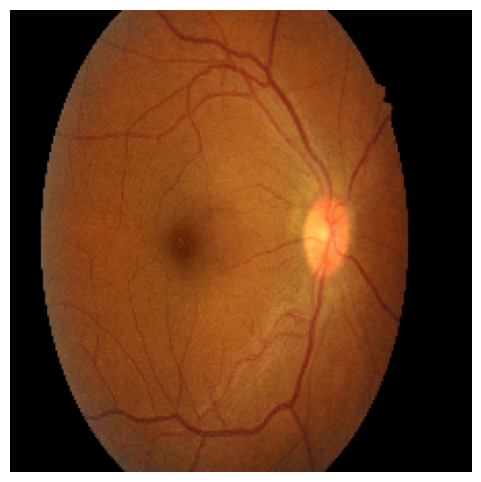

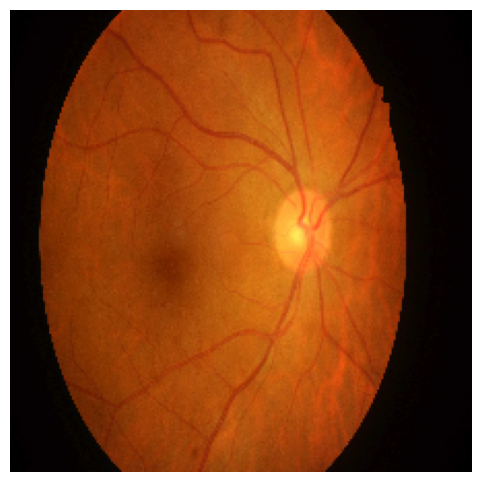

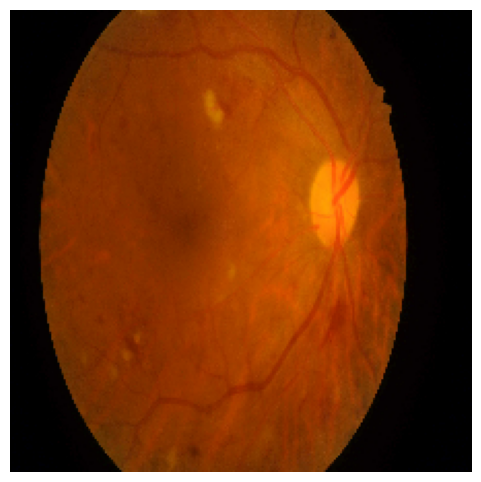

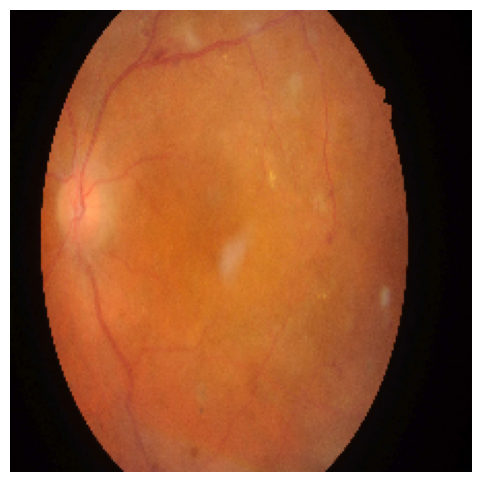

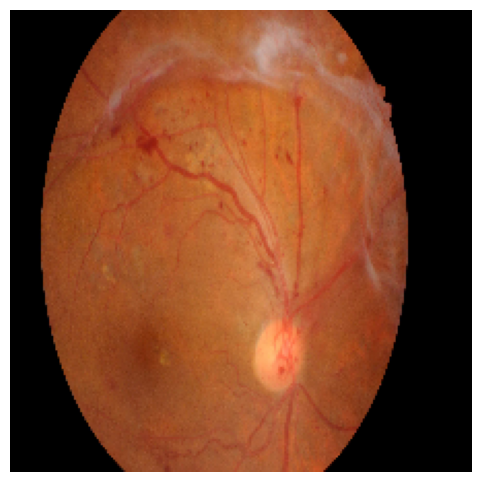

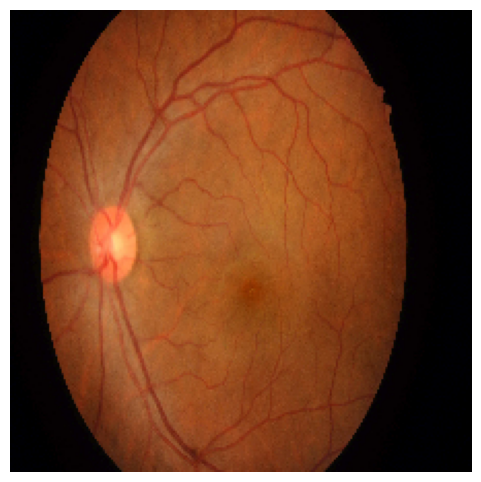

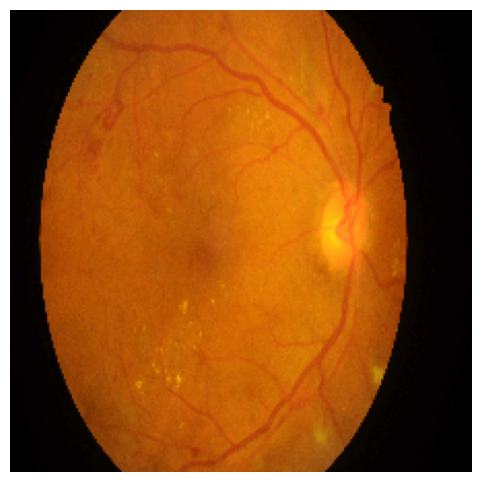

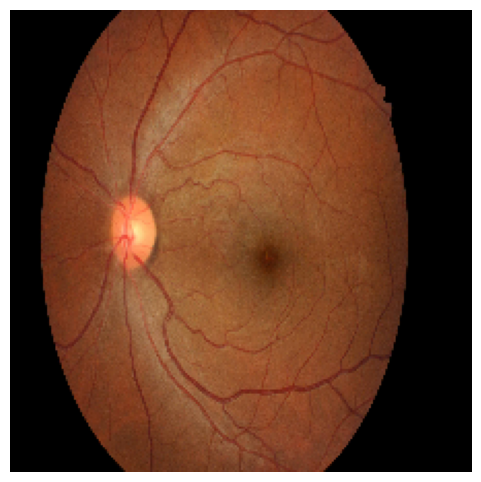

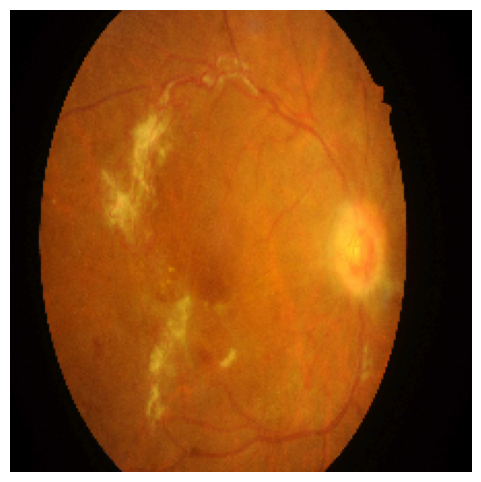

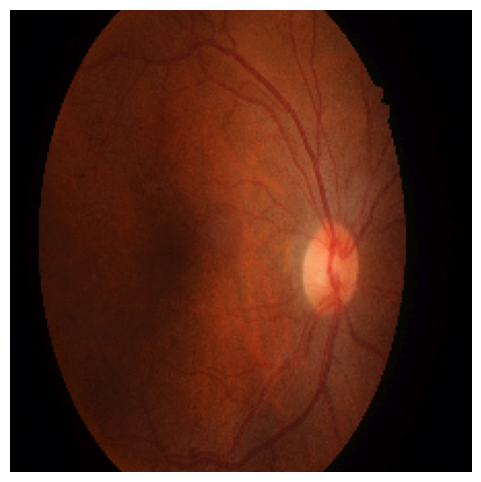

In [3]:
import matplotlib.pyplot as plt

# Create an iterator for the dataset
iterator = iter(feature_train_df)

# Display a few sample images
num_samples = 10  # Number of samples to display
for i in range(num_samples):
    image = next(iterator)  # Get the next batch
    plt.figure(figsize=(6, 6))
    plt.imshow(image[0].numpy())  # Assuming images are in the first channel of the batch
    plt.axis('off')
    plt.show()

In [4]:
import tensorflow as tf
import os

# Define the directory where your images are stored
image_dir = "F:\\TY Docs\\SEM 5\\B. Disease Grading\\1. Original Images\\b. Testing Set"

# List all image file paths in the directory
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith((".jpg", ".jpeg", ".png"))]

# Create a dataset of image file paths
feature_test_df = tf.data.Dataset.from_tensor_slices(image_paths)

# Define a function to load and preprocess images
def load_and_preprocess_image(image_path):
    # Load the image file using TensorFlow
    image = tf.io.read_file(image_path)
    # Decode the image (JPEG or PNG)
    image = tf.image.decode_jpeg(image, channels=3)  # Adjust channels based on your images
    # Resize the image to a consistent size (e.g., 224x224)
    image = tf.image.resize(image, (224, 224))  # Adjust dimensions as needed
    # Normalize pixel values to the range [0, 1]
    image = image / 255.0
    return image

# Map the load_and_preprocess_image function to load and preprocess the images
feature_test_df = feature_test_df.map(load_and_preprocess_image)

# Now, you have a dataset of preprocessed images
# You can iterate through the dataset or use it in training pipelines

# Optionally, you can batch, shuffle, and repeat the dataset
batch_size = 32
feature_test_df = feature_test_df.batch(batch_size)
feature_test_df = feature_test_df.shuffle(buffer_size=len(image_paths))
feature_test_df = feature_test_df.repeat()

# Example: Iterate through the first batch of images
for batch_images in feature_test_df.take(1):
    print("Batch shape:", batch_images.shape)


Batch shape: (7, 224, 224, 3)


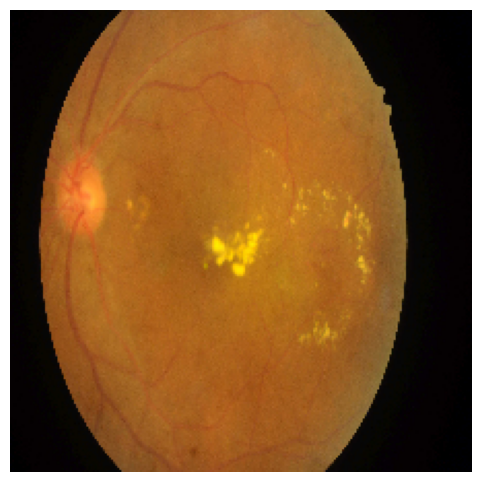

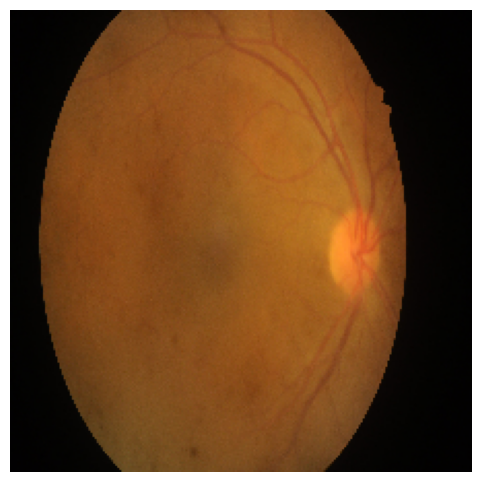

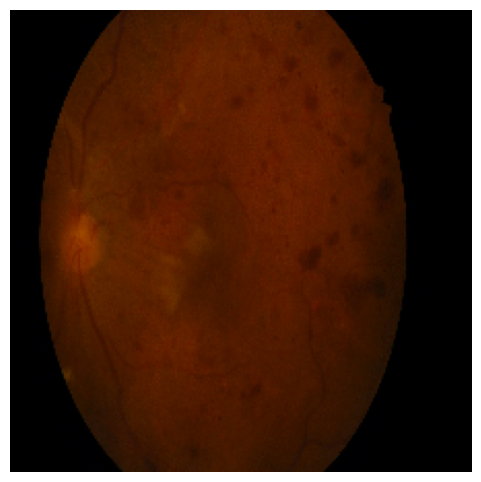

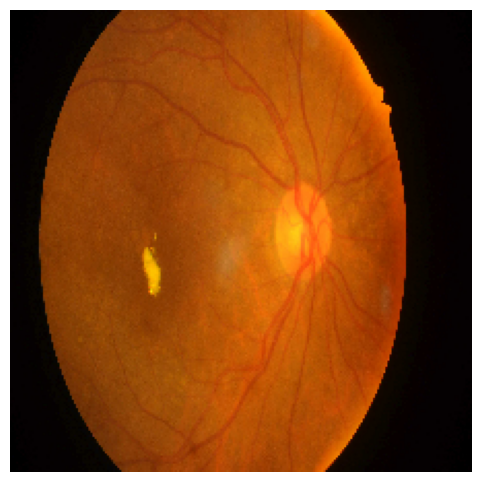

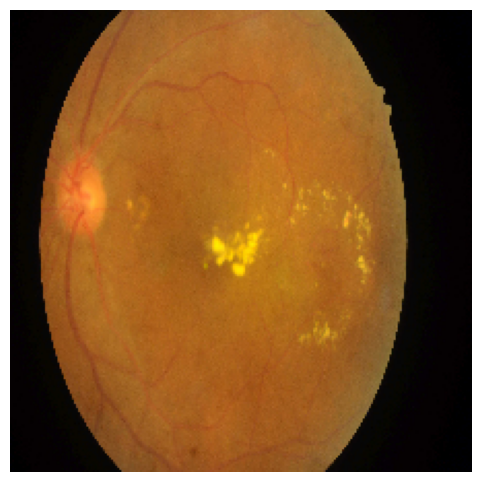

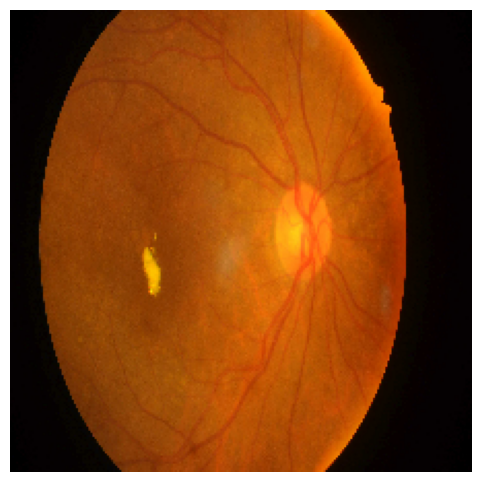

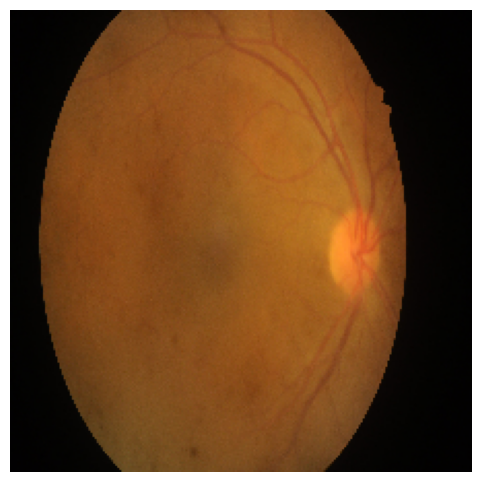

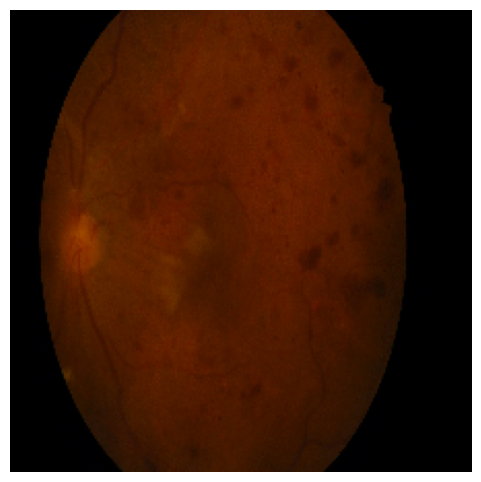

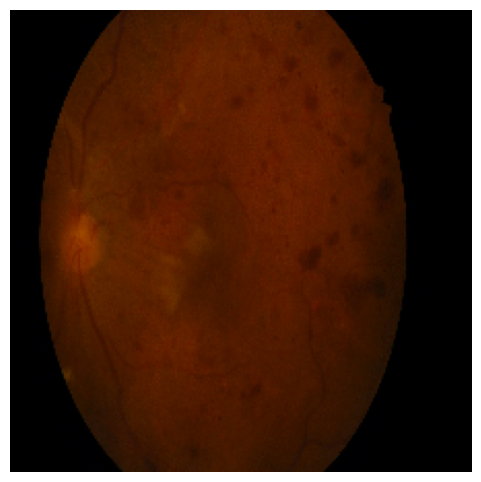

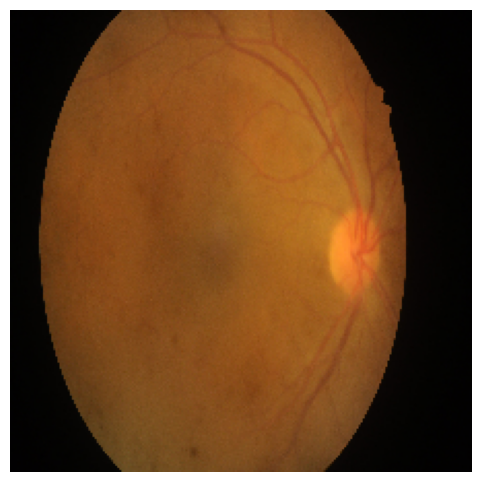

In [5]:
import matplotlib.pyplot as plt

# Create an iterator for the dataset
iterator = iter(feature_test_df)

# Display a few sample images
num_samples = 10  # Number of samples to display
for i in range(num_samples):
    image = next(iterator)  # Get the next batch
    plt.figure(figsize=(6, 6))
    plt.imshow(image[0].numpy())  # Assuming images are in the first channel of the batch
    plt.axis('off')
    plt.show()

In [6]:
import os
import shutil

folder_path = "F:\\TY Docs\\SEM 5\\B. Disease Grading\\1. Original Images\\b. Testing Set"  # Replace with the path to your folder
new_name_prefix = 'IDRiD_'  # You can change the prefix as needed
start_sequence_number = 414
output_folder = "F:\\TY Docs\\SEM 5\\Disease grading\\Renamed_test"  # Specify the full path to the new folder

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Iterate through the files, copy them to the new folder, and rename the copies
for i, filename in enumerate(file_list):
    if i >= 103:
        break  # Stop after processing 103 files
    
    # Determine the new filename
    new_filename = f"{new_name_prefix}{start_sequence_number + i:03}.jpg"  # Adjust the file extension if needed
    
    # Create the full path for the original and new filenames
    old_file_path = os.path.join(folder_path, filename)
    new_file_path = os.path.join(output_folder, new_filename)
    
    # Copy the file to the new folder
    shutil.copy2(old_file_path, new_file_path)

print(f"Image copying and renaming completed in the folder: {output_folder}")




Image copying and renaming completed in the folder: F:\TY Docs\SEM 5\Disease grading\Renamed_test


In [7]:
import os
import shutil

source_folder1 = "F:\\TY Docs\\SEM 5\\B. Disease Grading\\1. Original Images\\a. Training Set"
source_folder2 = "F:\\TY Docs\\SEM 5\\Disease grading\\Renamed_test"
destination_folder ="F:\\TY Docs\\SEM 5\\Disease grading\\Combined_test_train"

In [8]:
# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copy images from source_folder1 to the destination folder
for filename in os.listdir(source_folder1):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Adjust the file extensions as needed
        source_file = os.path.join(source_folder1, filename)
        destination_file = os.path.join(destination_folder, filename)
        shutil.copy2(source_file, destination_file)

# Copy images from source_folder2 to the destination folder
for filename in os.listdir(source_folder2):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Adjust the file extensions as needed
        source_file = os.path.join(source_folder2, filename)
        destination_file = os.path.join(destination_folder, filename)
        shutil.copy2(source_file, destination_file)

print("Images have been successfully copied to the destination folder.")

Images have been successfully copied to the destination folder.


In [9]:
import tensorflow as tf
import os

# Define the directory where your images are stored
image_dir = "F:\\TY Docs\\SEM 5\\Disease grading\\Combined_test_train"

# List all image file paths in the directory
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith((".jpg", ".jpeg", ".png"))]

# Create a dataset of image file paths
feature_df = tf.data.Dataset.from_tensor_slices(image_paths)

# Define a function to load and preprocess images
def load_and_preprocess_image(image_path):
    # Load the image file using TensorFlow
    image = tf.io.read_file(image_path)
    # Decode the image (JPEG or PNG)
    image = tf.image.decode_jpeg(image, channels=3)  # Adjust channels based on your images
    # Resize the image to a consistent size (e.g., 224x224)
    image = tf.image.resize(image, (224, 224))  # Adjust dimensions as needed
    # Normalize pixel values to the range [0, 1]
    image = image / 255.0
    return image

# Map the load_and_preprocess_image function to load and preprocess the images
feature_df= feature_df.map(load_and_preprocess_image)

# Now, you have a dataset of preprocessed images
# You can iterate through the dataset or use it in training pipelines

# Optionally, you can batch, shuffle, and repeat the dataset
batch_size = 32
feature_df = feature_df.batch(batch_size)
feature_df = feature_df.shuffle(buffer_size=len(image_paths))
feature_df = feature_df.repeat()

# Example: Iterate through the first batch of images
for batch_images in feature_df.take(1):
    print("Batch shape:", batch_images.shape)


Batch shape: (32, 224, 224, 3)


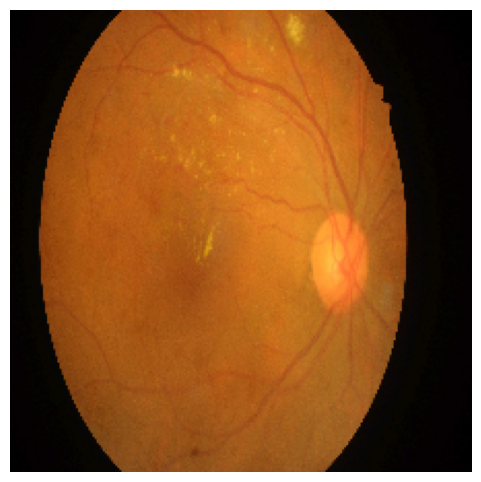

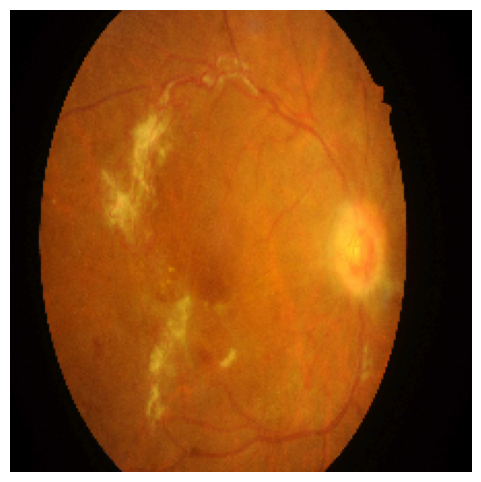

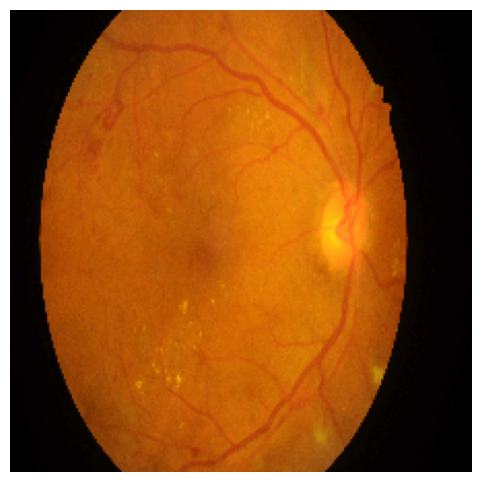

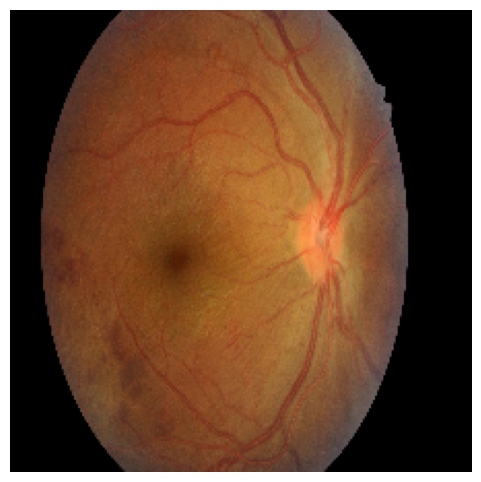

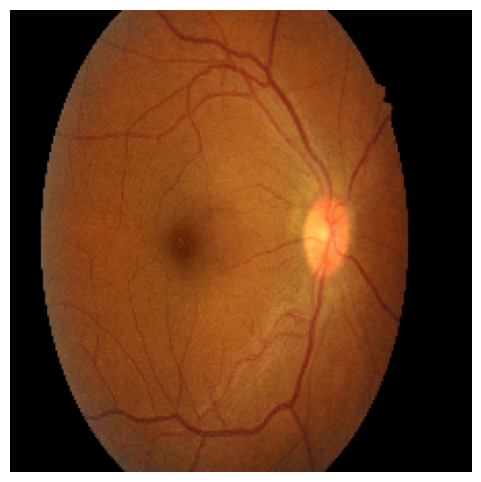

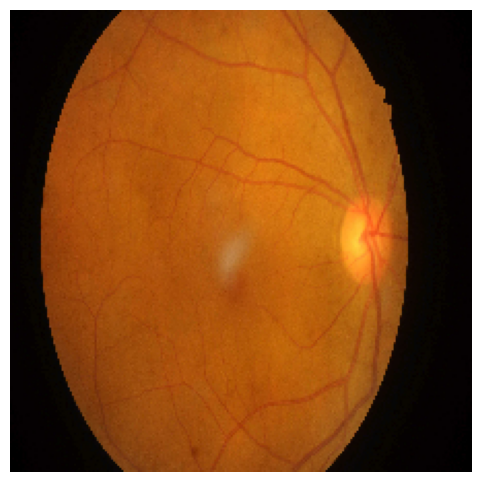

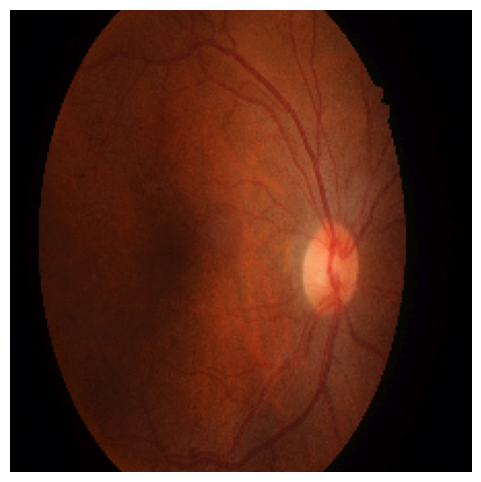

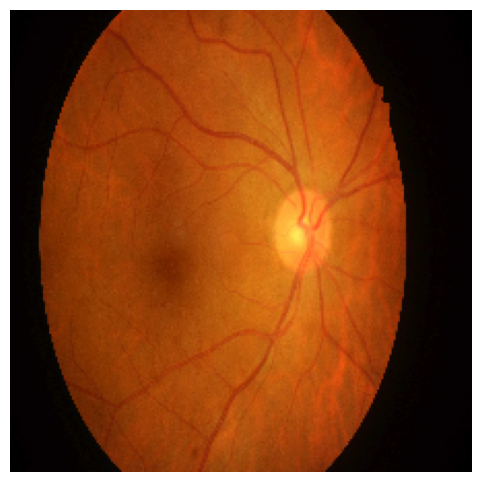

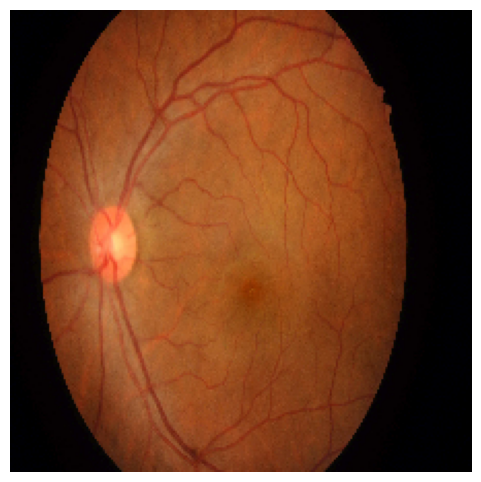

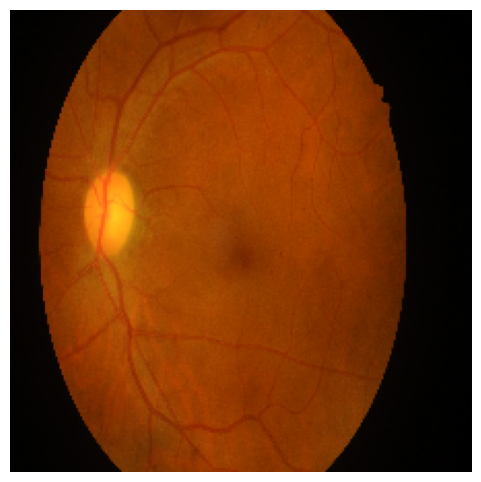

In [10]:
import matplotlib.pyplot as plt

# Create an iterator for the dataset
iterator = iter(feature_df)

# Display a few sample images
num_samples = 10  # Number of samples to display
for i in range(num_samples):
    image = next(iterator)  # Get the next batch
    plt.figure(figsize=(6, 6))
    plt.imshow(image[0].numpy())  # Assuming images are in the first channel of the batch
    plt.axis('off')
    plt.show()

In [11]:
import pandas as pd

df1 = pd.read_csv("F:\\TY Docs\\SEM 5\\B. Disease Grading\\2. Groundtruths\\a. IDRiD_Disease Grading_Training Labels.csv")
df2 = pd.read_csv("F:\\TY Docs\\SEM 5\\B. Disease Grading\\2. Groundtruths\\b. IDRiD_Disease Grading_Testing Labels.csv")

In [12]:
df1

Image name  Retinopathy grade  Risk of macular edema   Unnamed: 3  \
0    IDRiD_001                  3                       2         NaN   
1    IDRiD_002                  3                       2         NaN   
2    IDRiD_003                  2                       2         NaN   
3    IDRiD_004                  3                       2         NaN   
4    IDRiD_005                  4                       0         NaN   
..         ...                ...                     ...         ...   
408  IDRiD_409                  2                       1         NaN   
409  IDRiD_410                  2                       0         NaN   
410  IDRiD_411                  2                       0         NaN   
411  IDRiD_412                  2                       0         NaN   
412  IDRiD_413                  2                       0         NaN   

     Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0           NaN         NaN         NaN         NaN         NaN         NaN   
1           NaN         NaN         NaN         NaN         NaN         NaN   
2           NaN         NaN         NaN         NaN         NaN         NaN   
3           NaN         NaN         NaN         NaN         NaN         NaN   
4           NaN         NaN         NaN         NaN         NaN         NaN   
..          ...         ...         ...         ...         ...         ...   
408         NaN         NaN         NaN         NaN         NaN         NaN   
409         NaN         NaN         NaN         NaN         NaN         NaN   
410         NaN         NaN         NaN         NaN         NaN         NaN   
411         NaN         NaN         NaN         NaN         NaN         NaN   
412         NaN         NaN         NaN         NaN         NaN         NaN   

     Unnamed: 10 Unnamed: 11  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN  
..           ...         ...  
408          NaN         NaN  
409          NaN         NaN  
410          NaN         NaN  
411          NaN         NaN  
412          NaN         NaN  

[413 rows x 12 columns]

In [13]:
df1.drop(df1.loc[:,"Unnamed: 3": "Unnamed: 11"].columns, axis=1, inplace=True)

In [14]:
df1

Image name  Retinopathy grade  Risk of macular edema 
0    IDRiD_001                  3                       2
1    IDRiD_002                  3                       2
2    IDRiD_003                  2                       2
3    IDRiD_004                  3                       2
4    IDRiD_005                  4                       0
..         ...                ...                     ...
408  IDRiD_409                  2                       1
409  IDRiD_410                  2                       0
410  IDRiD_411                  2                       0
411  IDRiD_412                  2                       0
412  IDRiD_413                  2                       0

[413 rows x 3 columns]

In [15]:
df2

Image name  Retinopathy grade  Risk of macular edema 
0    IDRiD_001                  4                       0
1    IDRiD_002                  4                       1
2    IDRiD_003                  4                       0
3    IDRiD_004                  4                       0
4    IDRiD_005                  4                       1
..         ...                ...                     ...
98   IDRiD_099                  0                       0
99   IDRiD_100                  2                       1
100  IDRiD_101                  1                       0
101  IDRiD_102                  2                       2
102  IDRiD_103                  0                       0

[103 rows x 3 columns]

In [16]:
def rename_all_values(df2):
    prefix = 'IDRiD_'  # Define the prefix
    start_sequence_number = 414  # Starting sequence number
    # Generate new values by combining the prefix and the sequence number
    df2['Image name'] = [f'{prefix}{start_sequence_number + i}' for i in range(len(df2))]
    return df2

df2 = rename_all_values(df2)
df2.to_csv('renamed_df2.csv', index=False)

In [17]:
renamed_df2 = pd.read_csv('renamed_df2.csv')

In [18]:
renamed_df2

Image name  Retinopathy grade  Risk of macular edema 
0    IDRiD_414                  4                       0
1    IDRiD_415                  4                       1
2    IDRiD_416                  4                       0
3    IDRiD_417                  4                       0
4    IDRiD_418                  4                       1
..         ...                ...                     ...
98   IDRiD_512                  0                       0
99   IDRiD_513                  2                       1
100  IDRiD_514                  1                       0
101  IDRiD_515                  2                       2
102  IDRiD_516                  0                       0

[103 rows x 3 columns]

In [19]:
combined_df = pd.concat([df1, renamed_df2], axis=0, ignore_index=True)
combined_df.to_csv('F:\\TY Docs\\SEM 5\\Disease grading\\combined_df.csv', index=False)
print("CSV files combined successfully.")

CSV files combined successfully.


In [20]:
combined_df

Image name  Retinopathy grade  Risk of macular edema 
0    IDRiD_001                  3                       2
1    IDRiD_002                  3                       2
2    IDRiD_003                  2                       2
3    IDRiD_004                  3                       2
4    IDRiD_005                  4                       0
..         ...                ...                     ...
511  IDRiD_512                  0                       0
512  IDRiD_513                  2                       1
513  IDRiD_514                  1                       0
514  IDRiD_515                  2                       2
515  IDRiD_516                  0                       0

[516 rows x 3 columns]

In [21]:
y=combined_df[["Risk of macular edema "]]
y

Risk of macular edema 
0                         2
1                         2
2                         2
3                         2
4                         0
..                      ...
511                       0
512                       1
513                       0
514                       2
515                       0

[516 rows x 1 columns]

In [23]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load your CSV file with labels
csv_file_path = "F:\\TY Docs\\SEM 5\\Disease grading\\combined_df.csv"  # Replace with your CSV file path
combined_df = pd.read_csv(csv_file_path)

# Load and preprocess image dataset (X)
image_dir = "F:/TY Docs/SEM 5/Disease grading/Combined_test_train"  # Replace with your image dataset directory
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith((".jpg", ".jpeg", ".png"))]

# Initialize lists to store images and labels
images = []
y = []

# Load images and labels
for image_path, label in zip(image_paths, combined_df['Risk of macular edema ']):
    try:
        image = img_to_array(load_img(image_path, target_size=(512,512)))
        image = image / 255.0  # Normalize pixel values
        images.append(image)
        y.append(label)
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")

# Convert lists to NumPy arrays
images = np.array(images)
y = np.array(y)

# Define the number of samples for training and testing
num_train_samples = int(len(images) * 0.7)  # 70% for training
num_test_samples = int(len(images) * 0.2)   # 20% for testing

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(images, y, train_size=num_train_samples, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=num_test_samples, random_state=42)


In [24]:
print("Shape of images:", images.shape)
print("Shape of y:", y.shape)

Shape of images: (516, 512, 512, 3)
Shape of y: (516,)


In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
12/12 [==============================] - 56s 3s/step - loss: -45.5478 - accuracy: 0.0942 - val_loss: -65.7060 - val_accuracy: 0.0962
Epoch 2/10
12/12 [==============================] - 38s 3s/step - loss: -396.0090 - accuracy: 0.0942 - val_loss: -427.9634 - val_accuracy: 0.0962
Epoch 3/10
12/12 [==============================] - 38s 3s/step - loss: -2138.8760 - accuracy: 0.0942 - val_loss: -1858.4529 - val_accuracy: 0.0962
Epoch 4/10
12/12 [==============================] - 38s 3s/step - loss: -6948.1636 - accuracy: 0.0942 - val_loss: -6861.4722 - val_accuracy: 0.0962
Epoch 5/10
12/12 [==============================] - 37s 3s/step - loss: -21251.2109 - accuracy: 0.0970 - val_loss: -16117.7725 - val_accuracy: 0.0962
Epoch 6/10
12/12 [==============================] - 37s 3s/step - loss: -47726.8750 - accuracy: 0.0942 - val_loss: -37402.4336 - val_accuracy: 0.0962
Epoch 7/10
12/12 [==============================] - 37s 3s/step - loss: -93980.2578 - accuracy: 0.0997 - val_loss:

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

4/4 [==============================] - 2s 421ms/step - loss: -646671.3750 - accuracy: 0.1165
Test accuracy: 11.65%


In [29]:
model.save('my_model.h5')

C:\Users\rimjh\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


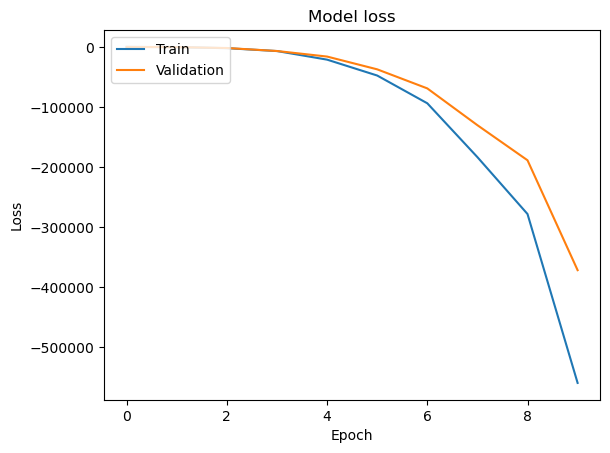

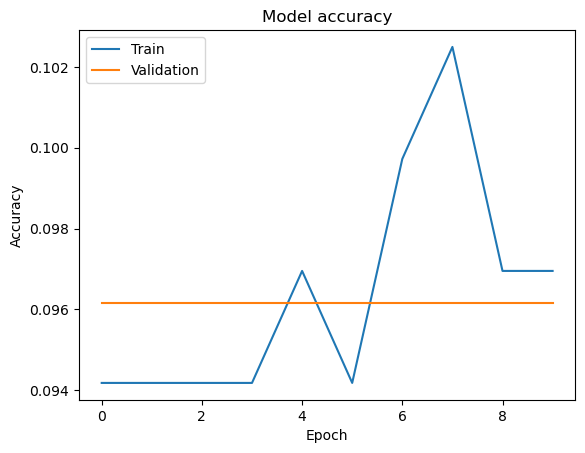

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
